# Chapter 4: Data Visualization

NOTE: Some figures may look slightly different due to different random samples between Python and R.

In [1]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter
# import NHANES package
base = importr('NHANES')

with localconverter(ro.default_converter + pandas2ri.converter):
  NHANES = ro.conversion.rpy2py(ro.r['NHANES'])

 
NHANES = NHANES.drop_duplicates(subset='ID')
NHANES['isChild'] = NHANES.Age < 18
NHANES_adult = NHANES.dropna(subset=['Height']).query('Age > 17')


## Figure 4.2

Text(0, 0.5, 'Damage Index')

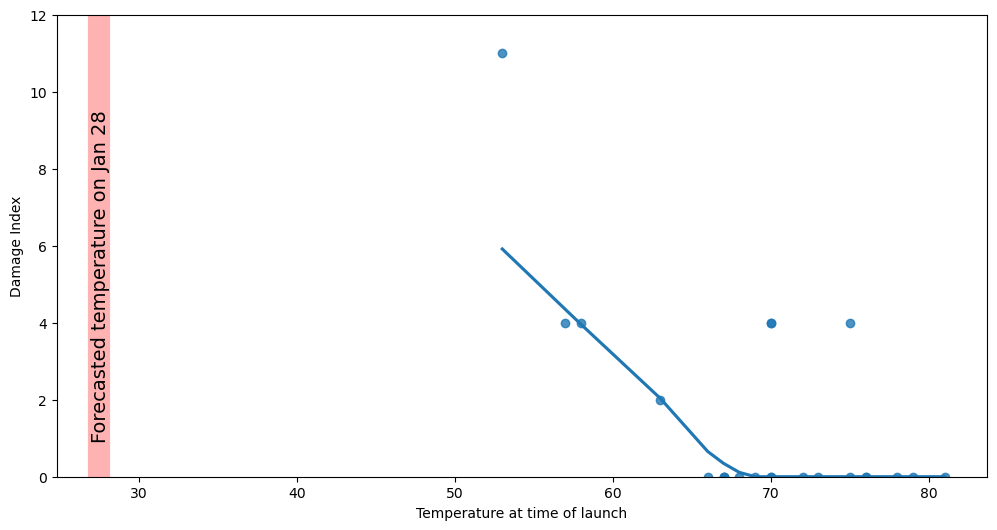

In [2]:
oringDf = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/orings.csv', index_col=0)

plt.figure(figsize=(12,6))
sns.regplot(data=oringDf, x='Temperature', y='DamageIndex', lowess=True, ci=None)
plt.ylim([0, 12])
plt.axvline(x =27.5, color = 'r', alpha=0.3, linewidth=16)
plt.annotate("Forecasted temperature on Jan 28", [27, 1], rotation=90, fontsize=14)
plt.xlabel('Temperature at time of launch')
plt.ylabel('Damage Index')

## Figure 4.3

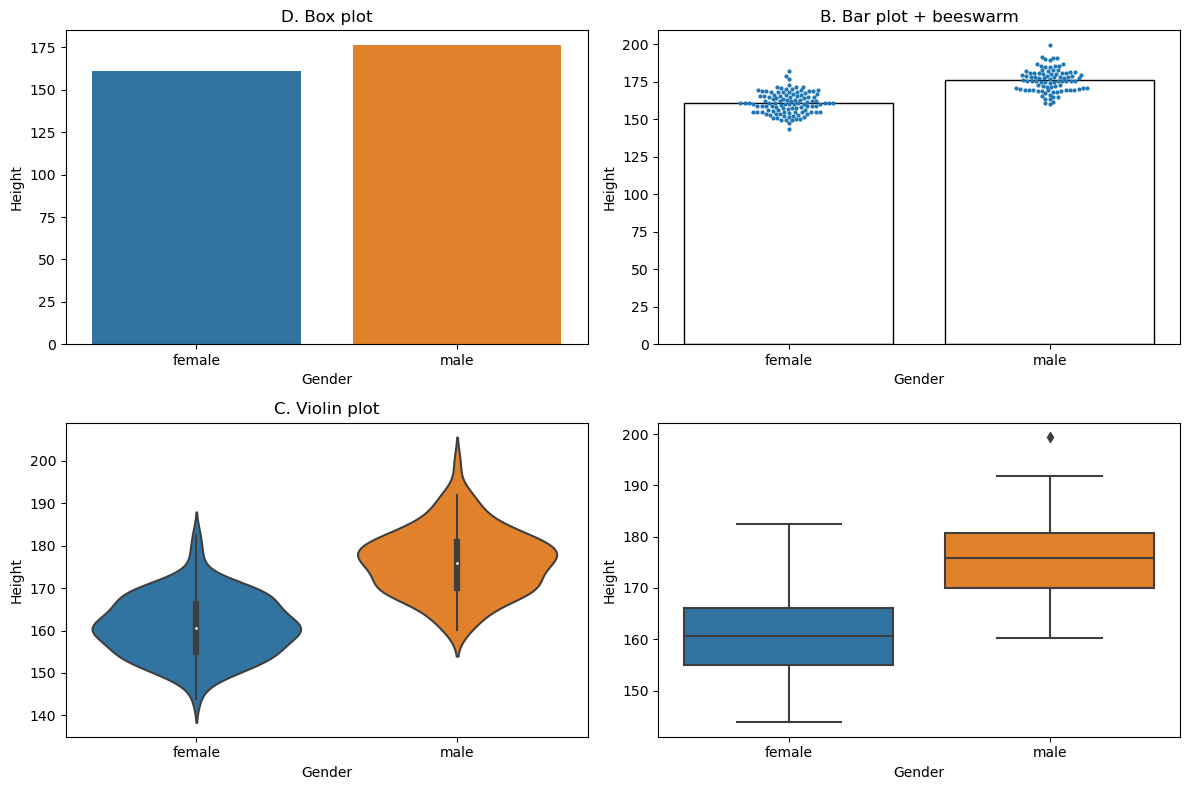

In [12]:
NHANES_sample = NHANES_adult.sample(200, random_state=12345)

fig, ax = plt.subplots(2, 2, figsize=(12,8))

sns.barplot(data=NHANES_sample, y='Height', x='Gender', errorbar=None, ax=ax[0][0])
ax[0][0].set_title('A. Bar plot')

sns.barplot(data=NHANES_sample, y='Height', x='Gender', errorbar=None, fill=None, ax=ax[0][1])
sns.swarmplot(data=NHANES_sample, y='Height', x='Gender', size=3, ax=ax[0][1])
ax[0][1].set_title('B. Bar plot + beeswarm')


sns.violinplot(data=NHANES_sample, y='Height', x='Gender', errorbar=None, ax=ax[1][0])
ax[1][0].set_title('C. Violin plot')

sns.boxplot(data=NHANES_sample, y='Height', x='Gender',  ax=ax[1][1])
ax[0][0].set_title('D. Box plot')
plt.tight_layout()

## Figure 4.4

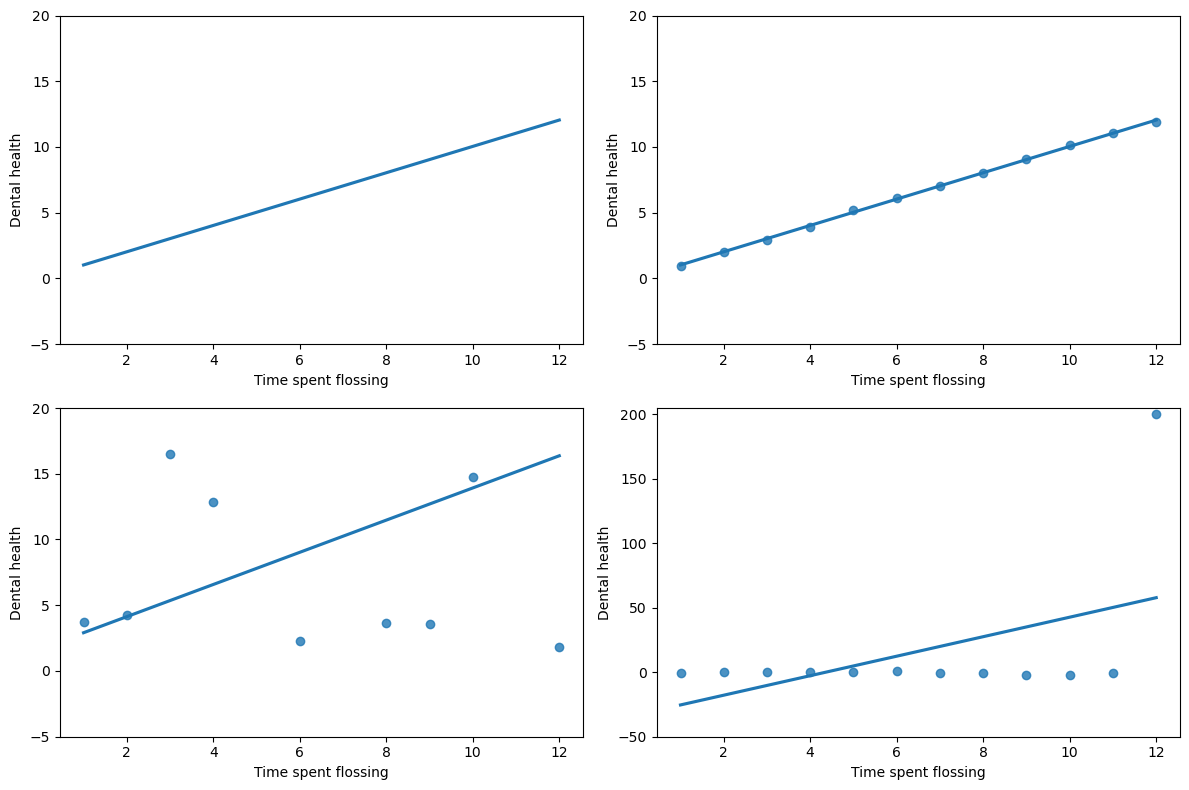

In [13]:
npts = 12
rng = np.random.RandomState(12345)
df = pd.DataFrame({'x': list(range(1, npts + 1))})
df['yClean'] = df.x + rng.randn(npts)*0.1
df['yDirty'] = df.x + rng.randn(npts)*10
df['yOutlier'] = rng.randn(npts)
df.loc[npts - 1, 'yOutlier'] = 200

fig, ax = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(data=df, x='x', y='yClean', ax=ax[0][0], ci=None,scatter=False)

sns.regplot(data=df, x='x', y='yClean', ax=ax[0][1], ci=None)

sns.regplot(data=df, x='x', y='yDirty', ax=ax[1][0], ci=None)

sns.regplot(data=df, x='x', y='yOutlier', ax=ax[1][1], ci=None)

for i in range(2):
    for j in range(2):
        ax[i][j].set_ylim(-5,20)
        ax[i][j].set_ylabel('Dental health')
        ax[i][j].set_xlabel('Time spent flossing')
ax[1][1].set_ylim(-50, 205)
plt.tight_layout()

## Figure 4.5

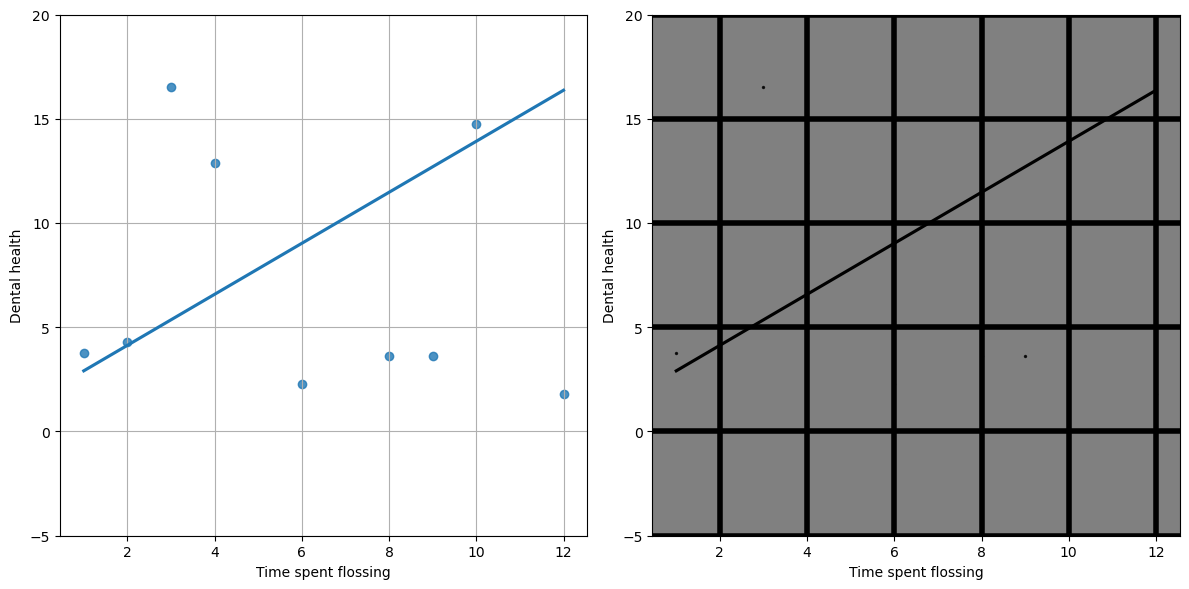

In [14]:

fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.regplot(data=df, x='x', y='yDirty', ax=ax[0], ci=None)
ax[0].grid()

sns.regplot(data=df, x='x', y='yDirty', ax=ax[1], ci=None, scatter_kws={'s':2}, color ='k')
ax[1].grid(linewidth=4, color='k')
ax[1].set_facecolor('gray')

for i in range(2):
    ax[i].set_ylim(-5,20)
    ax[i].set_ylabel('Dental health')
    ax[i].set_xlabel('Time spent flossing')

plt.tight_layout()

## Figure 4.7

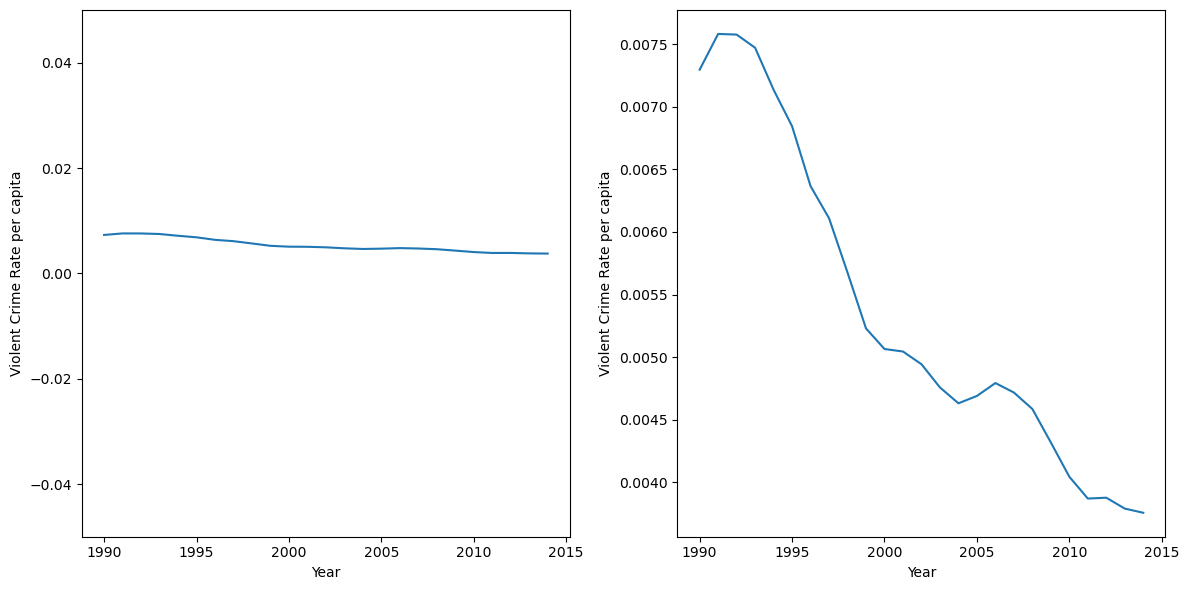

In [15]:
crimeData = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/CrimeStatebyState.csv',  skip_blank_lines=True, comment='#')
crimeData = crimeData.query('Year > 1989')
crimeData['ViolentCrimePerCapita'] = crimeData['Violent crime total'] / crimeData['Population']

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].plot(crimeData.Year, crimeData.ViolentCrimePerCapita)
ax[0].set_ylim((-0.05,0.05))
ax[1].plot(crimeData.Year, crimeData.ViolentCrimePerCapita)
for i in range(2):
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Violent Crime Rate per capita')

plt.tight_layout()


## Figure 4.8


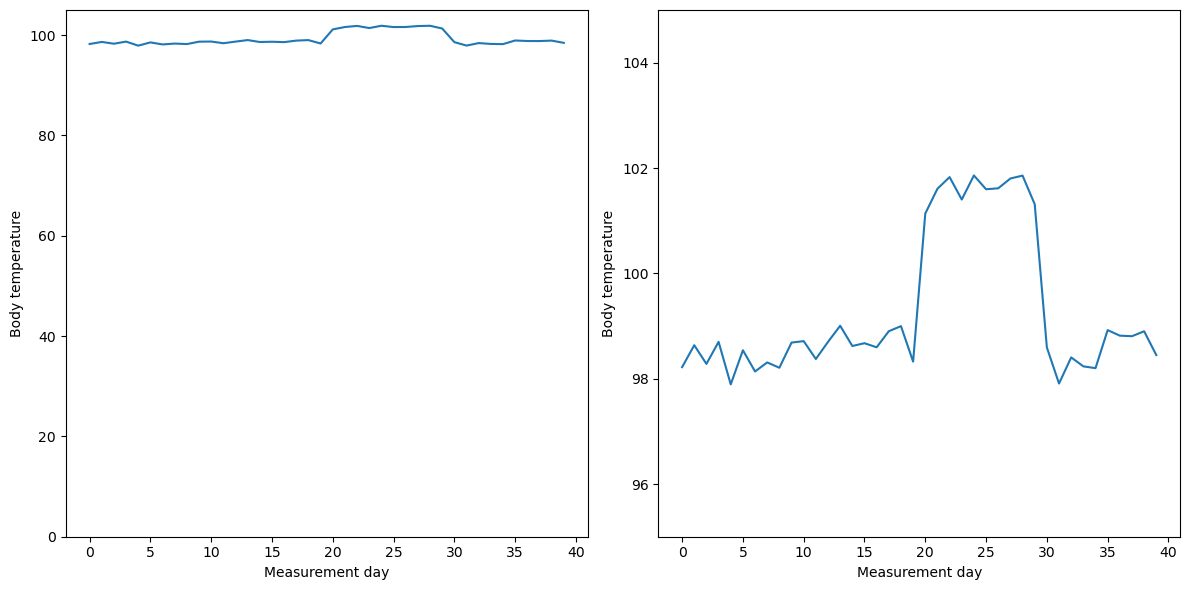

In [16]:
npts = 40
bodyTempDf = pd.DataFrame({'days': list(range(npts)),
                           'temp': rng.randn(npts)*0.3 + 98.6})
bodyTempDf.iloc[20:30, 1] += 3


fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].plot(bodyTempDf.days, bodyTempDf.temp)
ax[0].set_ylim((0, 105))
ax[1].plot(bodyTempDf.days, bodyTempDf.temp)
ax[1].set_ylim((95, 105))

for i in range(2):
    ax[i].set_xlabel('Measurement day')
    ax[i].set_ylabel('Body temperature')

plt.tight_layout()


## Figure 4.9


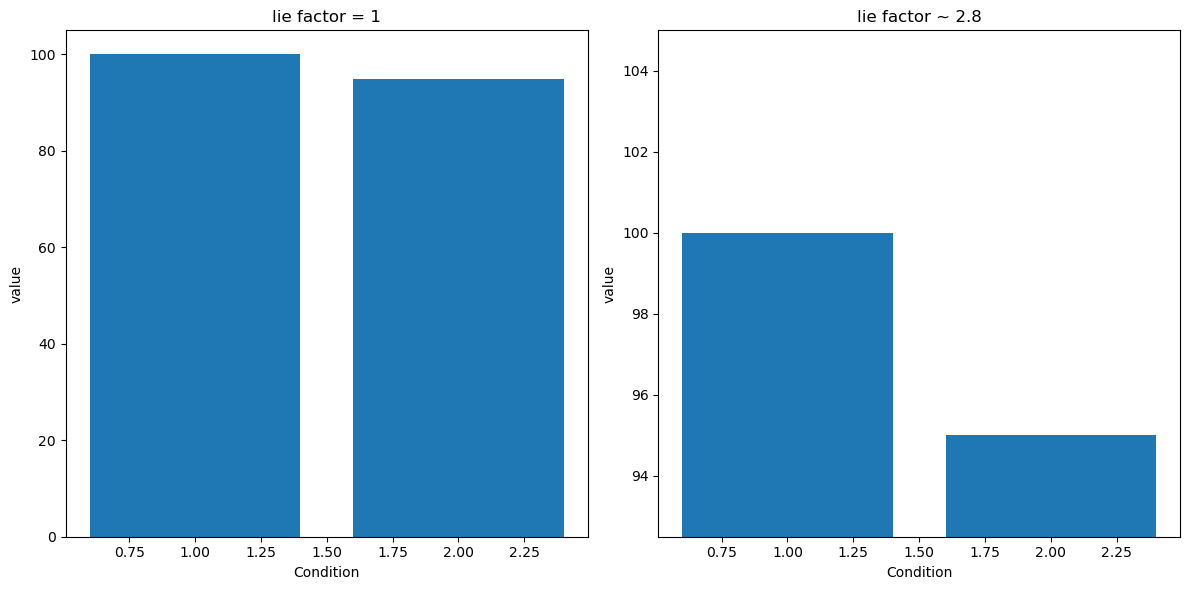

In [17]:
df = pd.DataFrame({'condition': [1, 2], 'value': [100, 95]})

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].bar(df.condition, df.value)
ax[0].set_ylim((0, 105))
ax[0].set_title('lie factor = 1')
ax[1].bar(df.condition, df.value)
ax[1].set_ylim((92.5,105))
ax[1].set_title('lie factor ~ 2.8')

for i in range(2):
    ax[i].set_xlabel('Condition')
    ax[i].set_ylabel('value')

plt.tight_layout()


## Figure 4.11


<Axes: xlabel='Religion', ylabel='Percentage'>

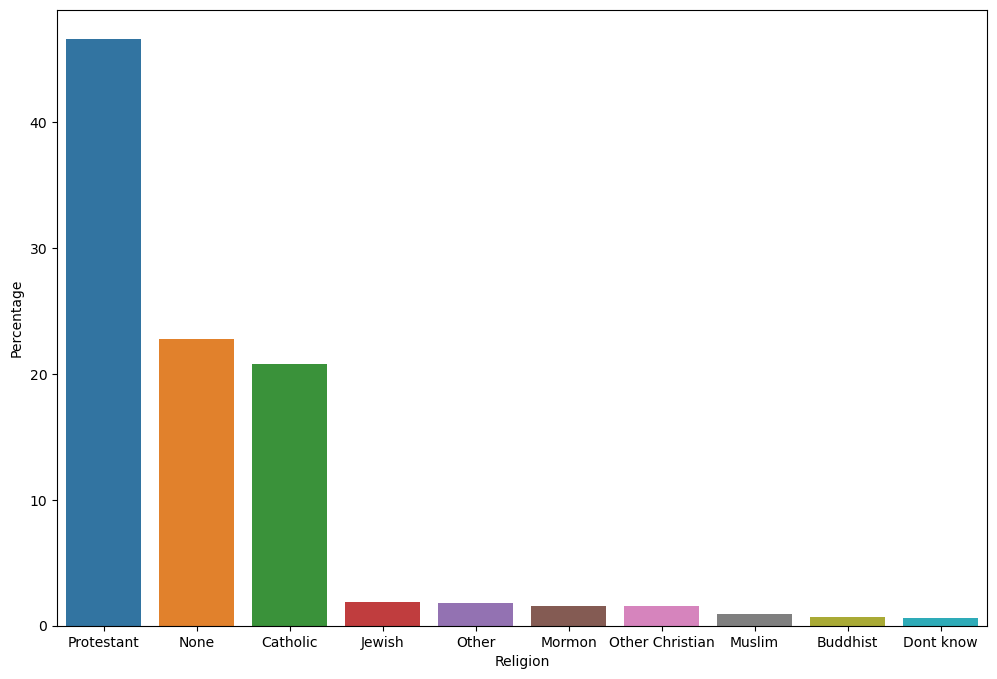

In [19]:
religionData = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/religion_data.txt', delimiter='\t', header=None,
                          names=['Religion','Percentage'])
religionData = religionData.sort_values('Percentage', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=religionData, x='Religion', y='Percentage')

## Figure 4.13

<Axes: xlabel='Year', ylabel='value'>

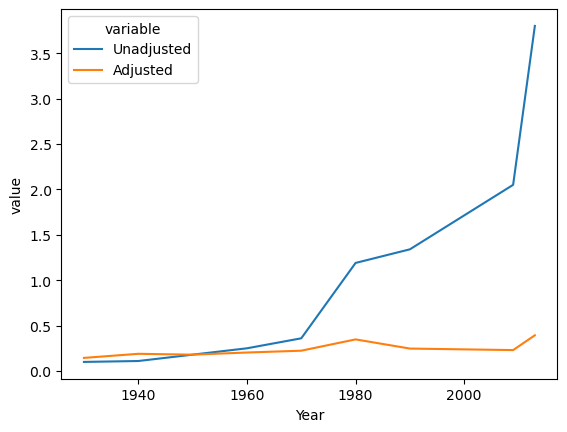

In [20]:
cpiData = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main//cpi_data.txt', delimiter='\t', header=None)
cpiData = cpiData[[0, 13]]
cpiData.columns = ['Year', 'meanCPI']

cpiRef = cpiData[cpiData.Year == 1950].meanCPI.values[0]
cpiData = cpiData.set_index('Year')

gasPriceData = pd.DataFrame({'Year': [1930,1940,1950,1960,1970,1980,1990,2009,2013],
                        'Unadjusted': [.10,.11,.18,.25,.36,1.19,1.34,2.05,3.80]})
gasPriceData = gasPriceData.set_index('Year')


gasPriceData = gasPriceData.join(cpiData, how="left", rsuffix='r_')
gasPriceData['Adjusted'] = gasPriceData.Unadjusted/(gasPriceData.meanCPI/cpiRef)
gasPriceData['Year'] = gasPriceData.index

gasPriceData_long = pd.melt(gasPriceData, value_vars=['Unadjusted', 'Adjusted'], id_vars=['Year'])

sns.lineplot(data=gasPriceData_long, x='Year', y='value', hue='variable', errorbar=None)